# DEMO Log In and Download Sentinel 3 Image

In [1]:
import openeo
from matplotlib import pyplot as plt
import rasterio.plot
import io
import tarfile
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
connection = openeo.connect('https://openeo.digitalearth.se')
connection.authenticate_basic(username='ix102', password='secretpassword')


<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

In [3]:
connection.list_collections()

[{'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'NMD_Produktivitet_v1_1',
  'title': 'NMD_Produktivitet_v1_1',
  'description': 'Tilläggsskikt produktivitet',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-27T06:26:59.086425Z',
      '2023-04-27T06:26:59.086425Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/NMD_Produktivitet_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-27T06:26:59.086425Z', '2023-04-27T06:26:59.086425Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['produktivitet']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'nmd2018bas_ogeneraliserad_v1_1',
  'title': 'nmd2018bas_ogeneraliserad_v1_1',
  'description': 'Nationella marktäckedata (NMD)',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-25T14:23:34.643233Z',
      '2023-04-25T14:23:34.643233Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/nmd2018bas_ogeneraliserad_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-25T14:23:34.643233Z', '2023-04-25T14:23:34.643233Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['basskikt']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 's2_msi_l1c',
  'title': 's2_msi_l1c',
  'description': 'Sentinel-2 Level1C - Ortho Rectified Top of Atmosphere Reflectance',
  'license': 'CC-BY-4.0',
  'extent': {'spatial': {'bbox': [[8.999626281785673,
      54.9150072246983,
      26.330890180835535,
      69.4096405079696]]},
   'temporal': {'interval': [['2015-07-04T10:10:06.027000Z',
      '2023-11-06T10:51:39.024000Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c/items'

# Sentinel 2 Images

In [32]:
directories=['0316fae7-d2c1-40b7-b6b1-572503129723', '124c5465-43c0-4b8b-a624-f78a237a4a55', '307f0810-6f13-4bde-b88c-b9eaf8ce5d25', '3b208f65-cf77-4349-9708-a9a4fc06f5d8',
            '3b9b0586-98ce-4603-bd8b-a81423647b70', '43ab4c4c-310b-44ae-9548-e09017656537', '48948379-d614-4be8-a319-8174a15875e0', '5f22ce6c-8d7d-438f-ab05-bd043a708e82',
            '6061d236-faf2-4e6f-83cb-3fdda8451144', '68dbadbe-22e8-4839-afa9-b6dbe8331b22', '783b6f31-d468-4a86-802d-41b2c8df9bc2', '7e2fa848-3d2a-4eb4-99b6-4ffd36a8fb46',
            '866209bc-5ef4-4917-8759-21be697c4fc8', '88a26a3d-7ac4-4342-95ed-e630bc7122d0', '8ef56cc8-841a-41db-87e7-08c2a41b381c', '9eb96d40-6ca4-43b6-863e-f75211c1bfe0',
            '9fd0096b-b3d8-499f-84c1-89e69cc0a743', 'b8c67bde-8f24-4102-bd11-7893e64070d6', 'bcfbcb12-8d19-4a50-88fb-d57f847b6943', 'c5382068-a8ab-40c7-a638-92a14fe493bc',
            'e44bba51-a024-4890-9758-bcf82bde1e98', 'f3d18472-a865-459b-a5d7-a4cda0d1ce30']

In [7]:
bounds=[(21.081429516727276, 64.47332646553158, 21.089819028766374, 64.47694168289054),
        (16.50815845995665, 61.82523535598029, 16.516718413090413, 61.829290070622605),
        (21.05767819536007, 64.28091977201667, 21.06937056977549, 64.28601347968281),
        (18.300985309662696, 63.92758522307279, 18.30998040747666, 63.93154051431014),
        (21.170935890838262, 66.50773002100946, 21.197688814851407, 66.51843119061472),
        (17.23971485188451, 64.75137609043033, 17.25406305269862, 64.75751046614072),
        (12.850852396349707, 59.43240323952557, 12.866658567030305, 59.44046128732352),
        (17.467254690290435, 58.79260558527193, 17.474429164530086, 58.79632768093009),
        (17.97292748926682, 63.35964201886707, 17.98210456584113, 63.36376840221884),
        (15.399499503081893, 61.436547181718005, 15.40705433992742, 61.44014890626063),
        (16.440273618888927, 60.415983592212456, 16.446777188927314, 60.419198284626866),
        (15.84355342105258, 62.40802773345975, 15.854721186320596, 62.413227990569276),
        (14.83316318449942, 62.5618753226763, 14.848956729552846, 62.569188287117385),
        (16.970354444217655, 60.40634329116336, 16.976336394599628, 60.40931177781907),
        (19.190861573064954, 63.406105177105196, 19.19915425274756, 63.409832548809234),
        (18.69295577891962, 63.450556005780285, 18.70757513955599, 63.45709353676909),
        (21.471671474734087, 67.02212437404565, 21.487530420421898, 67.02833663620999),
        (16.777067715125934, 62.95259329271203, 16.788592618413027, 62.95786304402918),
        (15.372730638062217, 61.95703727656105, 15.38307261636242, 61.96192766940068),
        (13.243573044798211, 60.98561947817546, 13.252680458650824, 60.99004915417381),
        (16.07803991597795, 61.92043808856059, 16.087142411649836, 61.92472975952375),
        (16.940014398635554, 60.41518127558475, 16.948056715615984, 60.41914196552624)]

In [8]:
temporals=[['2022-10-18','2022-10-23','2022-10-25','2023-05-13','2023-05-21','2023-05-26','2023-06-07','2023-06-10','2023-06-15','2023-06-17','2023-07-02','2023-07-10','2023-07-12','2023-08-09'],
        ['2022-09-06','2022-09-11','2022-09-21','2022-10-08','2022-10-11','2023-04-16','2023-04-19','2023-04-21','2023-05-11','2023-05-19','2023-05-29','2023-06-23','2023-06-25','2023-07-08','2023-07-10','2023-07-28','2023-08-27','2023-09-06','2023-09-08','2023-09-13'],
        ['2022-09-08','2022-09-10','2022-09-20','2022-10-08','2022-10-23','2023-05-11','2023-05-13','2023-05-21','2023-06-07','2023-06-12','2023-06-15','2023-06-17','2023-06-20','2023-07-10','2023-07-12','2023-07-27','2023-08-06','2023-08-09','2023-08-11','2023-08-26'],
        ['2022-10-13','2022-10-18','2022-10-21','2022-10-23','2023-05-11','2023-05-14','2023-05-19','2023-05-21','2023-06-08','2023-06-15','2023-06-23','2023-07-03','2023-07-23','2023-08-29','2023-09-08','2023-09-26'],
        ['2019-09-22','2020-06-08','2020-06-10','2020-06-12','2020-06-13','2020-06-17','2020-06-23','2020-06-28','2020-08-02','2020-08-16','2020-09-01','2020-09-10','2021-05-28','2021-05-29','2021-06-03','2021-06-23','2021-06-28','2021-07-03','2021-07-05','2021-07-17','2021-07-23','2021-07-25','2021-07-27','2021-07-28','2021-08-14','2021-08-17','2021-08-27','2021-08-31','2021-09-11','2022-06-22','2022-06-25','2022-06-27','2022-06-30','2022-07-03','2022-07-30','2022-08-14','2022-08-26','2022-08-29','2022-09-03','2022-09-08','2022-09-20','2022-10-06','2022-10-08','2022-10-23','2023-05-23','2023-05-29','2023-06-15','2023-06-18','2023-06-30','2023-07-10','2023-08-04'],
        ['2022-07-20','2022-08-25','2022-09-04','2022-09-11','2022-09-19','2022-09-21','2022-10-04','2022-10-23','2023-05-22','2023-06-15','2023-07-10','2023-07-28'],
        ['2022-10-11','2022-10-19','2022-10-29','2023-03-28','2023-04-07','2023-04-12','2023-04-17','2023-04-19','2023-04-27','2023-05-02','2023-05-04','2023-05-07','2023-05-12','2023-05-19','2023-05-22','2023-05-27','2023-06-01','2023-06-03','2023-06-08','2023-06-11'],
        ['2022-08-24','2022-08-26','2022-09-05','2022-09-25','2022-10-10','2022-10-23','2022-10-30','2023-03-02','2023-04-16','2023-04-18','2023-04-21','2023-04-23','2023-04-26','2023-05-06','2023-05-11','2023-06-02','2023-06-07','2023-06-12','2023-06-15','2023-06-20','2023-06-22','2023-06-25','2023-07-10','2023-07-25','2023-08-01','2023-08-11','2023-08-16'],
        ['2022-07-20','2022-07-23','2022-08-09','2022-08-14','2022-08-22','2022-09-21','2022-10-08','2022-10-13','2023-05-11','2023-05-19','2023-06-13','2023-06-15','2023-06-18','2023-06-30','2023-07-10'],
        ['2022-10-26','2023-04-21','2023-04-22','2023-05-06','2023-05-07','2023-05-11','2023-05-19','2023-05-21','2023-05-29','2023-06-01','2023-06-08','2023-06-11','2023-06-13','2023-06-15','2023-06-23','2023-06-25','2023-06-26','2023-07-20','2023-07-28','2023-08-24','2023-09-06','2023-09-09','2023-09-13','2023-09-14','2023-09-23','2023-10-04','2023-10-08','2023-10-09','2023-10-11','2023-10-16'],
        ['2022-10-11','2023-03-10','2023-03-12','2023-04-09','2023-04-11','2023-04-16','2023-04-19','2023-04-21','2023-05-06','2023-05-11','2023-05-19','2023-05-29','2023-06-03','2023-06-23','2023-06-25','2023-06-28','2023-08-22','2023-09-06','2023-09-23'],
        ['2022-09-06','2022-09-21','2022-10-04','2022-10-08','2022-10-11','2022-10-16','2022-10-21','2022-10-31','2023-05-11','2023-05-19','2023-05-27','2023-06-11','2023-06-13','2023-06-15','2023-06-18','2023-06-23','2023-06-25','2023-07-08','2023-07-20','2023-07-28','2023-08-24','2023-09-06','2023-09-09','2023-09-13'],
        ['2022-09-04','2022-09-06','2022-10-04','2022-10-21','2022-10-31','2023-05-19','2023-05-27','2023-05-29','2023-06-11','2023-06-13'],
        ['2022-09-21','2022-09-25','2022-10-08','2022-10-11','2022-10-16','2022-10-18','2022-10-20','2022-10-30','2023-04-03','2023-04-16','2023-04-18','2023-04-21','2023-05-06','2023-05-11','2023-05-31','2023-06-07','2023-06-13','2023-06-17','2023-06-25','2023-06-28','2023-07-10','2023-08-14','2023-09-05','2023-09-06','2023-09-23'],
        ['2018-07-11','2018-07-13','2018-07-16','2018-07-18','2018-07-19','2018-07-23','2018-07-24','2018-07-31','2018-08-03','2018-08-07','2018-08-08','2018-08-15','2018-08-20','2018-08-23','2018-08-25','2018-08-27','2018-08-28','2018-09-01','2018-09-02','2018-09-04','2018-09-06','2018-09-16','2018-09-22','2018-09-27','2018-10-01','2018-10-02','2018-10-04','2018-10-06','2018-10-07','2018-10-11','2018-10-14','2018-10-24','2019-04-30','2019-05-14','2019-05-17','2019-05-20','2019-05-27','2019-06-04','2019-06-06','2019-06-08','2019-06-09','2019-06-18','2019-06-24','2019-07-03','2019-07-09','2019-07-13','2019-07-18','2019-07-19','2019-07-21','2019-07-24','2019-07-26','2019-07-28','2019-08-05','2019-08-10','2019-08-20','2019-08-22','2019-08-28','2019-09-04','2019-09-06','2019-09-14','2019-09-19','2019-09-22','2020-04-21','2020-05-09','2020-05-16','2020-05-18','2020-05-21','2020-05-23','2020-05-26','2020-05-29','2020-05-31','2020-06-10','2020-06-12','2020-06-13','2020-06-15','2020-06-20','2020-06-22','2020-06-25','2020-06-28','2020-07-02','2020-07-05','2020-07-17','2020-08-01','2020-08-07','2020-08-09','2020-08-11','2020-08-14','2020-08-16','2020-08-17','2020-08-21','2020-08-24','2020-09-01','2020-09-06','2020-09-08','2020-09-10','2020-10-16','2021-05-11','2021-05-13','2021-05-26','2021-05-28','2021-05-31','2021-06-02','2021-06-03','2021-06-05','2021-06-08','2021-06-10','2021-06-25','2021-06-28','2021-07-02','2021-07-03','2021-07-05','2021-07-08','2021-07-12','2021-07-13','2021-07-15','2021-07-20','2021-07-22','2021-07-23','2021-07-27','2021-07-28','2021-08-06','2021-08-07','2021-08-11','2021-08-12','2021-08-22','2021-08-24','2021-08-27','2021-08-29','2021-08-31','2021-10-18','2022-05-06','2022-05-09','2022-05-11','2022-05-18','2022-05-19','2022-05-23','2022-05-24','2022-05-26','2022-06-05','2022-06-07','2022-06-12','2022-06-17','2022-06-20','2022-06-22','2022-06-25','2022-06-27','2022-06-28','2022-06-30','2022-07-03','2022-07-05','2022-07-07','2022-07-12','2022-07-13','2022-07-20','2022-07-23','2022-08-07','2022-08-12','2022-08-14','2022-08-16','2022-08-22','2022-08-24','2022-08-26','2022-08-29','2022-08-31','2022-09-01','2022-09-05','2022-09-20','2022-09-21','2022-10-08','2022-10-21','2022-10-25','2023-05-11','2023-05-14','2023-05-18','2023-05-21','2023-05-23','2023-06-05','2023-06-07','2023-06-12','2023-06-15','2023-06-17','2023-06-18','2023-06-20','2023-06-23','2023-06-28','2023-07-10','2023-07-27'],
        ['2022-08-31','2022-09-05','2022-09-20','2022-10-08','2022-10-13','2022-10-20','2022-10-21','2022-10-25','2023-05-19','2023-05-23','2023-06-02','2023-06-15','2023-06-17','2023-06-18','2023-06-23','2023-07-10','2023-08-29','2023-09-06','2023-09-08'],
        ['2022-10-08','2022-10-23','2023-05-14','2023-05-21','2023-05-29','2023-06-05','2023-06-15','2023-06-25','2023-06-30','2023-07-10'],
        ['2022-08-02','2022-08-12','2022-08-22','2022-08-25','2022-09-11','2022-10-21','2022-10-31','2023-03-03','2023-05-11','2023-05-19','2023-06-11','2023-06-15','2023-06-18','2023-06-25','2023-06-26','2023-06-30','2023-07-10','2023-08-05','2023-08-09','2023-08-29','2023-09-06','2023-09-09'],
        ['2022-08-25','2022-09-04','2022-09-21','2022-10-04','2022-10-08','2022-10-21','2022-10-29','2023-05-11','2023-05-22','2023-05-27','2023-06-01','2023-06-08','2023-06-11','2023-06-13','2023-06-15','2023-06-25','2023-06-26','2023-07-08','2023-07-10','2023-08-24'],
        ['2022-08-22','2022-08-25','2022-09-06','2022-10-11','2023-05-27','2023-06-01','2023-06-08','2023-06-11','2023-09-24','2023-10-01','2023-10-04','2023-10-09','2023-10-11','2023-10-14'],
        ['2022-08-22','2022-08-24','2022-09-06','2022-09-21','2022-10-06','2022-10-08','2022-10-11','2022-10-26','2023-05-06','2023-05-11','2023-05-19','2023-05-29','2023-06-13','2023-06-15','2023-06-25','2023-07-08','2023-08-14','2023-08-29'],
        ['2022-09-06','2022-09-21','2022-09-25','2022-10-06','2022-10-20','2022-10-26','2022-10-30','2023-03-19','2023-04-03','2023-04-16','2023-04-18','2023-04-21','2023-05-11','2023-05-19','2023-05-31','2023-06-02','2023-06-07','2023-06-08','2023-06-12','2023-06-13','2023-06-17','2023-06-23','2023-06-25','2023-07-10','2023-07-22','2023-08-14','2023-09-05','2023-09-06']]

In [133]:
test_bound=bounds[0]
test_temporal=temporals[0]

west=test_bound[0]
east= test_bound[2]
south= test_bound[1]
north= test_bound[3]

res=connection.load_collection(
                         "s2_msi_l2a",
                         spatial_extent={
                            "west": west,
                            "east": east,
                            "south": south,
                            "north": north
                             },
                         #temporal_extent=["2021-07-01T00:00:00Z", "2021-08-01T00:00:00Z"],
                         temporal_extent=[str(test_temporal[0])+"T00:00:00Z", str(test_temporal[0])+"T23:59:59Z"],
                         #temporal_extent=["2021-06-10T00:00:00Z", "2022-06-20T00:00:00Z"],
                         bands=['b02','b03','b04']#,'b05','b06','b07','b08','b8a','b09','b10','b11','b12']
                        )
res.flat_graph()



{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'bands': ['b02', 'b03', 'b04'],
   'id': 's2_msi_l2a',
   'spatial_extent': {'west': 21.081429516727276,
    'east': 21.089819028766374,
    'south': 64.47332646553158,
    'north': 64.47694168289054},
   'temporal_extent': ['2022-10-18T00:00:00Z', '2022-10-18T23:59:59Z']},
  'result': True}}

In [134]:
res

In [145]:
import shutil
import os
dir='tmp_1c'
fname='tmp_1c/test'
os.mkdir(dir)
res.download(outputfile=fname,format="netcdf")

In [157]:
## Loop di loop
dir='tmp_1c'
fname='tmp_1c/test'

for temp in test_temporal:
    res=connection.load_collection(
                            "s2_msi_l2a",
                            spatial_extent={
                                "west": west,
                                "east": east,
                                "south": south,
                                "north": north
                                },
                            #temporal_extent=["2021-07-01T00:00:00Z", "2021-08-01T00:00:00Z"],
                            temporal_extent=[str(temp)+"T00:00:00Z", str(temp)+"T23:59:59Z"],
                            #temporal_extent=["2021-06-10T00:00:00Z", "2022-06-20T00:00:00Z"],
                            bands=['b02','b03','b04']#,'b05','b06','b07','b08','b8a','b09','b10','b11','b12']
                            )

    res.download(outputfile=fname+'_'+str(temp),format="netcdf")


In [158]:
import xarray as xr
loaded_data = xr.open_dataset(fname, engine='netcdf4', decode_times=True)
nodata = loaded_data.attrs.get("nodata", None)
loaded_data = loaded_data.where(loaded_data != nodata, np.nan)
loaded_data

FileNotFoundError: [Errno 2] No such file or directory: '/home/edgelab/filip/SEEX30_Cloud_Fog/SEEX30_Cloud_Fog/Cloud_rm/tmp_1c/test'

In [147]:
import datetime
from pysolar.solar import *

times=loaded_data['t'].data
loaded_data=loaded_data.assign({"west":west,"east":east,"north":north,"south":south})

lat=(west+east)/2
long=(south+north)/2

sun_zenith_angles=[]
for time in times:
    tmp=time.astype('datetime64[us]')
    tmp=tmp.astype(datetime.datetime)
    dobj = datetime.datetime(tmp.year,tmp.month,tmp.day,tmp.hour,tmp.minute,tmp.second,tmp.microsecond,tzinfo=datetime.timezone.utc)
    sea = get_altitude(lat, long, dobj)
    sza = float(90)- sea
    sun_zenith_angles.append(sza)

loaded_data=loaded_data.assign({"sun_zenith":sun_zenith_angles})
loaded_data.to_netcdf(fname)

In [148]:
loaded_data

<xarray.Dataset> Size: 49kB
Dimensions:      (t: 1, y: 45, x: 45, sun_zenith: 1)
Coordinates:
  * t            (t) datetime64[ns] 8B 2022-10-18T10:20:31.024000
  * y            (y) float64 360B 7.164e+06 7.164e+06 ... 7.164e+06 7.164e+06
  * x            (x) float64 360B 7.92e+05 7.92e+05 ... 7.925e+05 7.925e+05
    spatial_ref  int32 4B 3006
  * sun_zenith   (sun_zenith) float64 8B 52.49
Data variables:
    b02          (t, y, x) float64 16kB 1.154e+03 1.093e+03 ... 1.14e+03
    b03          (t, y, x) float64 16kB 1.172e+03 1.092e+03 ... 1.23e+03
    b04          (t, y, x) float64 16kB 1.242e+03 1.054e+03 ... 1.159e+03
    west         float64 8B 21.08
    east         float64 8B 21.09
    north        float64 8B 64.48
    south        float64 8B 64.47
Attributes:
    crs:                EPSG:3006
    nodata:             -9999
    collection:         s2_msi_l2a
    datetime_from_dim:  2024-04-02T14:13:46.226934

In [149]:
loaded_data = xr.open_dataset(fname, engine='netcdf4', decode_times=True)
nodata = loaded_data.attrs.get("nodata", None)
loaded_data = loaded_data.where(loaded_data != nodata, np.nan)
loaded_data

<xarray.Dataset> Size: 49kB
Dimensions:      (t: 1, y: 45, x: 45, sun_zenith: 1)
Coordinates:
  * t            (t) datetime64[ns] 8B 2022-10-18T10:20:31.024000
  * y            (y) float64 360B 7.164e+06 7.164e+06 ... 7.164e+06 7.164e+06
  * x            (x) float64 360B 7.92e+05 7.92e+05 ... 7.925e+05 7.925e+05
    spatial_ref  int32 4B 3006
  * sun_zenith   (sun_zenith) float64 8B 52.49
Data variables:
    b02          (t, y, x) float64 16kB 1.154e+03 1.093e+03 ... 1.14e+03
    b03          (t, y, x) float64 16kB 1.172e+03 1.092e+03 ... 1.23e+03
    b04          (t, y, x) float64 16kB 1.242e+03 1.054e+03 ... 1.159e+03
    west         float64 8B 21.08
    east         float64 8B 21.09
    north        float64 8B 64.48
    south        float64 8B 64.47
Attributes:
    crs:                EPSG:3006
    nodata:             -9999
    collection:         s2_msi_l2a
    datetime_from_dim:  2024-04-02T14:13:46.226934

In [150]:
times=loaded_data['t']
times.data

array(['2022-10-18T10:20:31.024000000'], dtype='datetime64[ns]')

In [151]:
variables=loaded_data.variables

In [152]:
## Setup for calculating RGB images

maxR = 3.0 ## max reflectance
midR = 0.13
sat = 1.3
gamma = 2.3
ray = { 'r': 0.013, 'g': 0.024, 'b': 0.041}



gOff = 0.01
gOffPow = gOff**gamma
gOffRange = (1 + gOff)**gamma - gOffPow


adjGamma = lambda b : ((b + gOff)**gamma - gOffPow)/gOffRange


def adj(a,tx,ty,maxC):
    ar = a/maxC
    ar[ar>1]=1
    ar[ar<0]=0
    return ar*(ar*(tx/maxC + ty - 1)- ty)/(ar*(2*tx/maxC - 1) - tx / maxC)

def satEnh(r,g,b):
    avgS = (r + g + b) / 3.0 * (1 - sat)
    tmpr=avgS + r * sat
    tmpr[tmpr>1]=1
    tmpr[tmpr<0]=0
    tmpg=avgS + g * sat
    tmpg[tmpg>1]=1
    tmpg[tmpg<0]=0
    tmpb=avgS + b * sat
    tmpb[tmpb>1]=1
    tmpb[tmpb<0]=0
    return [tmpr, tmpg, tmpb]


sAdj = lambda a: adjGamma(adj(a, midR, 1, maxR))
sRGB = lambda c: (12.92 * c) if c<= 0.0031308 else (1.055 * c**0.41666666666 - 0.055)

IndexError: index 1 is out of bounds for axis 0 with size 1

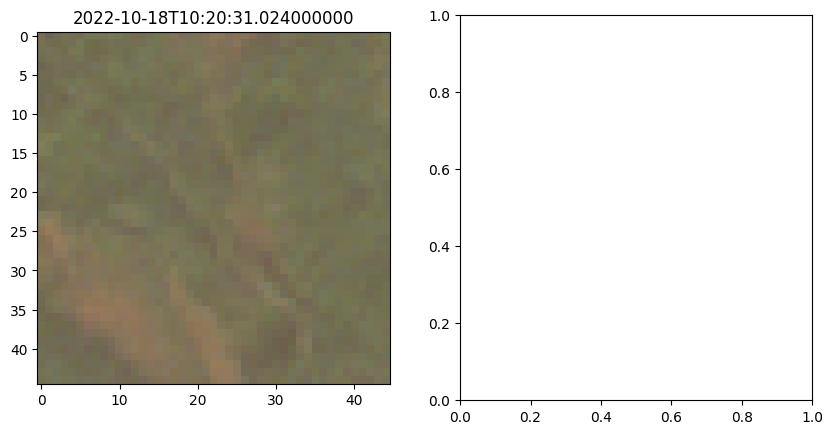

In [153]:
ncols=2
nrows=int(np.ceil(len(times)/ncols))

plt.rcParams['figure.figsize'] = [5*ncols, 5*nrows]
fig, axs = plt.subplots(ncols=ncols,nrows=nrows)
for i,ax in enumerate(axs.ravel()):
    b04=variables['b04'].data[i,:,:]
    b03=variables['b03'].data[i,:,:]
    b02=variables['b02'].data[i,:,:]

    b04T=sAdj(b04/10000-ray['r'])
    b03T=sAdj(b03/10000-ray['g'])
    b02T=sAdj(b02/10000-ray['b'])

    rgbLin=satEnh(b04T,b03T,b02T)
    #avgS = ((b04T + b03T + b02T)/3.0) * (1 - sat)
    for k,p in enumerate(rgbLin[0]):
        for j,q in enumerate(p):
            rgbLin[0][k,j]=sRGB(q)
    for k,p in enumerate(rgbLin[1]):
        for j,q in enumerate(p):
            rgbLin[1][k,j]=sRGB(q)
    for k,p in enumerate(rgbLin[2]):
        for j,q in enumerate(p):
            rgbLin[2][k,j]=sRGB(q)
                
    b04T=rgbLin[0]
    b03T=rgbLin[1]
    b02T=rgbLin[2]

    im=np.zeros((np.shape(b03)[0],np.shape(b03)[1],3))
    im[:,:,0]=b04T
    im[:,:,1]=b03T
    im[:,:,2]=b02T

    ax.imshow(im)#/np.max(im,axis=(0,1)))
    ax.set_title(times.data[i])
    

In [154]:
np.max(im,axis=(0,1))

array([0.59409643, 0.50089947, 0.39537198])